<a href="https://colab.research.google.com/github/ProjectofTheDay/MLProject/blob/main/Amazon%20Book%20Review%20-%20EDA%26Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset from Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deafitriaihdarosyada","key":"bbdd65b295d70691866f8ecb7812f554"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews

100% 1.06G/1.06G [00:35<00:00, 37.9MB/s]
100% 1.06G/1.06G [00:35<00:00, 32.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('amazon-books-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Pre-processing Data

In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#load dataset
rating = pd.read_csv('/content/Books_rating.csv')
data = pd.read_csv('/content/books_data.csv')

#check dataset shape
print(rating.shape)
print(data.shape)

(3000000, 10)
(212404, 10)


In [7]:
rating.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [8]:
data.head(1)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [11]:
#merge two dataset
book = pd.merge(rating, data, on='Title')
book.shape

(3000000, 19)

In [12]:
book.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN


In [13]:
#drop columns that will not be used
book = book.drop(columns=['Id',
                          'Price',
                          'profileName',
                          'review/helpfulness',
                          'review/time',
                          'image',
                          'description',
                          'previewLink',
                          'publishedDate',
                          'infoLink',
                          'ratingsCount'])

book.shape

(3000000, 8)

In [14]:
book.rename(columns = {'User_id':'id'}, inplace = True)
book.head(1)

,Title,id,review/score,review/summary,review/text,authors,publisher,categories
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,['Julie Strain'],NaN,['Comics & Graphic Novels']


In [15]:
#check missing values
book.isna().sum()

Title                208
id                561787
review/score           0
review/summary        38
review/text            8
authors           390634
publisher         782617
categories        551498
dtype: int64

In [16]:
#remove null values
book.dropna(inplace=True)
book.isna().sum()

Title             0
id                0
review/score      0
review/summary    0
review/text       0
authors           0
publisher         0
categories        0
dtype: int64

In [17]:
#remove duplicate values
book.drop_duplicates(subset=['review/summary',
                             'review/text'])
book.shape

(1719651, 8)

In [18]:
#remove brackets and apostrophe in authors values
book['authors'] = book['authors'].str.extract(r"\['(.*)'\]")

In [19]:
#remove brackets and apostrophe in categories values
book['categories'] = book['categories'].str.extract(r"\['(.*)'\]")

In [20]:
book.head(5)

,Title,id,review/score,review/summary,review/text,authors,publisher,categories
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,A&C Black,Biography & Autobiography
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,A&C Black,Biography & Autobiography
3,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,A&C Black,Biography & Autobiography
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,A&C Black,Biography & Autobiography
5,Dr. Seuss: American Icon,A2F6NONFUDB6UK,4.0,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel,A&C Black,Biography & Autobiography


# Exploratory Data Analysis

There are several questions asked with the aim of obtaining answers from the provided dataset. Some of these questions include:
1.   The distribution of ratings given when reviewing books.
2.   The book category that is most widely read, indicated by the highest number of reviews.
3.   The author with the most reviewed books.
4.   The book with the most reviews.


##**1. Rating Distribution**

In [21]:
book['score'] = book['review/score'].astype('object')

ds=book['score'].value_counts().reset_index()
ds.columns=['score','count']
ds

,score,count
0,5.0,1025677
1,4.0,348242
2,3.0,151290
3,1.0,108040
4,2.0,86402


From the table above, it can be seen that the user scores are divided into 5 categories, with 5 indicating a perfect score. There are a total of 1,025,677 reviews with a score of 5, and the lowest score is 2, which is associated with only 86,402 books.

The distribution rating in bar plot would look like the one under this.

Text(0.5, 1.0, 'Rating Distribution')

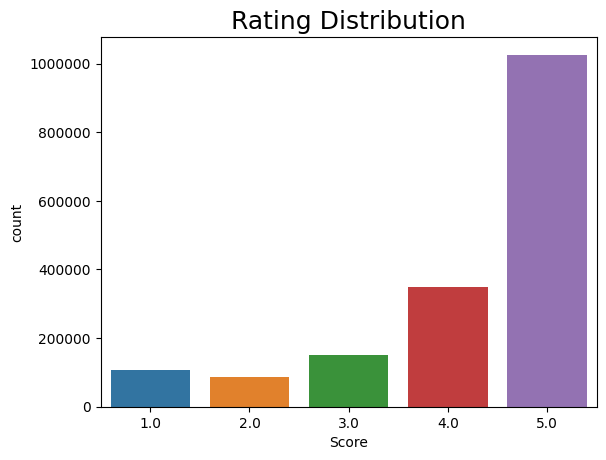

In [22]:
sns.barplot(x='score',y='count', data=ds)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Score')
plt.title('Rating Distribution', size=18)

##**2. Book Category**

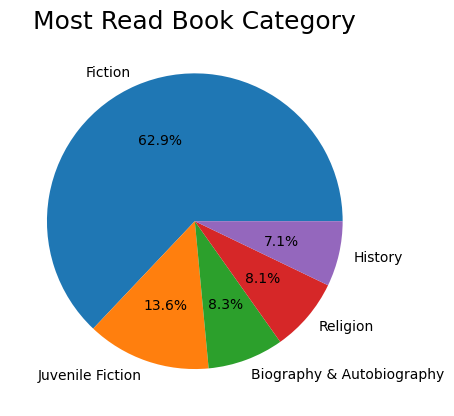

In [23]:
plt.pie(book['categories'].value_counts().head(5).values,
        labels=book['categories'].value_counts().head(5).index,
        autopct='%1.1f%%')
plt.title('Most Read Book Category', size=18)
plt.axis('off')
plt.show()

62.9% of Amazon users have reviewed books in the Fiction genre, which demonstrates that users tend to read books in the Fiction genre more often.

##**3. Book Author**


In [24]:
ds=book['authors'].value_counts().head(20).reset_index().rename(columns={'index':'author', 'authors':'count'})
ds.head(3)

,author,count
0,J. R. R. Tolkien,27895
1,Jane Austen,26222
2,Charles Dickens,13175


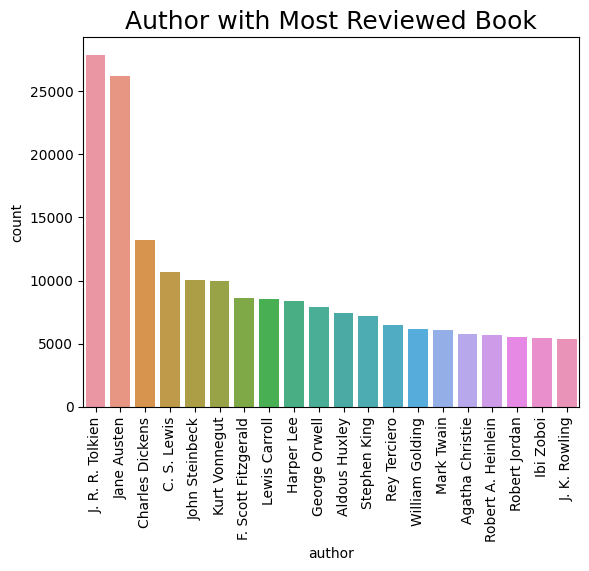

In [25]:
sns.barplot(x='author',y='count', data=ds)
plt.title('Author with Most Reviewed Book', size=18)
plt.xticks(rotation=90)
plt.show()

Author with the most reviews is J.R.R Tolkien, with review count reaching 27,895 for the books he wrote.

##**4. Reviewed Book**

In [26]:
ds = book['Title'].value_counts().head(10).reset_index()
ds.columns=['title', 'count']
ds.head(2)

,title,count
0,The Hobbit,18237
1,Pride and Prejudice,17969


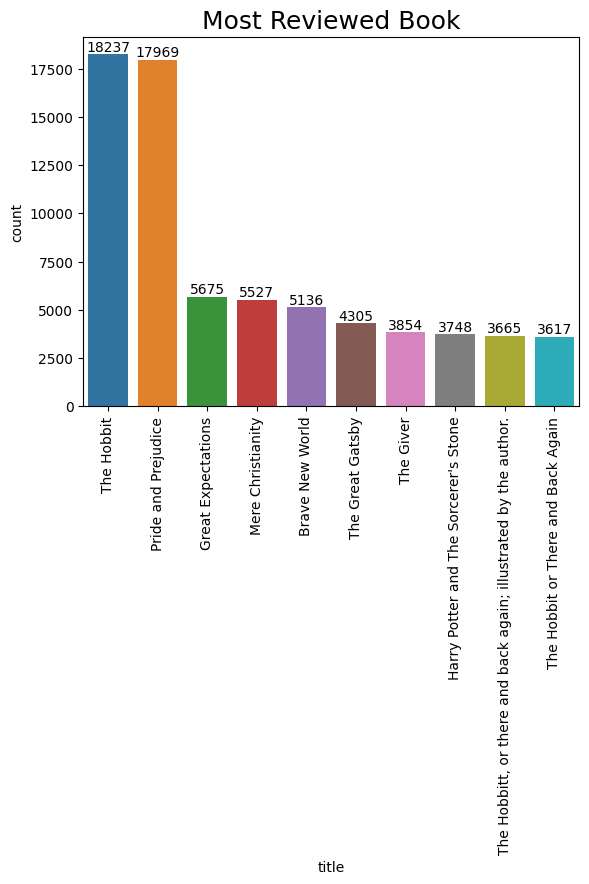

In [27]:
ax=sns.barplot(x='title',y='count', data=ds)
plt.title('Most Reviewed Book', size=18)
plt.xticks(rotation=90)
plt.bar_label(ax.containers[0])
plt.show()

The Hobbit has managed to become the book with the most review count, totaling 18,237 reviews.

# Sentiment Analysis

For the sentiment analysis, we will use NLTK to get the positivity and negativity score, also about how positive or negative a sentiment is.

In [28]:
#import library
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
sia = SentimentIntensityAnalyzer()

In [30]:
#clean the review text
book['review'] = book['review/text'].str.lower()
book.head(3)

,Title,id,review/score,review/summary,review/text,authors,publisher,categories,score,review
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,A&C Black,Biography & Autobiography,5.0,i don't care much for dr. seuss but after read...
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,A&C Black,Biography & Autobiography,5.0,"if people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,A&C Black,Biography & Autobiography,4.0,"theodore seuss geisel (1904-1991), aka &quot;d..."


In [34]:
#drop columns that will be not used in sentiment analysis
book1 = book.drop(['review/score',
                  'review/summary',
                  'review/text',
                  'authors',
                  'publisher',
                  'categories'], axis=1)
book1.rename(columns = {'id':'Id'}, inplace = True)
book1.head(3)

,Title,Id,score,review
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,i don't care much for dr. seuss but after read...
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,"if people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,"theodore seuss geisel (1904-1991), aka &quot;d..."


In [40]:
res = {}

for i, row in tqdm(book1.iterrows(), total=len(book1)):
  text = row['review']
  Id = row['Id']
  Title = row['Title']
  res[Id, Title] = sia.polarity_scores(text)

  0%|          | 0/1719651 [00:00<?, ?it/s]

In [42]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'level_0':'Id', 'level_1':'Title'})
vaders.head(4)

,Id,Title,neg,neu,pos,compound
0,A30TK6U7DNS82R,Dr. Seuss: American Icon,0.045,0.790,0.165,0.9876
1,A3UH4UZ4RSVO82,Dr. Seuss: American Icon,0.026,0.806,0.168,0.9935
2,A2MVUWT453QH61,Dr. Seuss: American Icon,0.034,0.884,0.083,0.9807
3,A22X4XUPKF66MR,Dr. Seuss: American Icon,0.061,0.799,0.140,0.9803


In [49]:
#merge data with cleaned review and its compound
bp = pd.merge(book1, vaders, on=['Id', 'Title'])
bp.head(2)

,Title,Id,score,review,neg,neu,pos,compound
0,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,i don't care much for dr. seuss but after read...,0.045,0.790,0.165,0.9876
1,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,"if people become the books they read and if ""t...",0.026,0.806,0.168,0.9935


In [63]:
#define positive, negative, neutral review through its compound value
#if it's greater than 0 then the review is positive
#if it's lesser than 0 then the review is negative

condition = [
    (bp['compound'] >= 0.1),
    (bp['compound'] <= -0.1),
    (bp['compound'] <= 0.1) & (bp['compound'] >= -0.1)
    ]

values = ['positive', 'negative', 'neutral']
bp['sentiment'] = np.select(condition, values)
bp.head(3)

,Title,Id,score,review,neg,neu,pos,compound,sentiment
0,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,i don't care much for dr. seuss but after read...,0.045,0.790,0.165,0.9876,positive
1,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,"if people become the books they read and if ""t...",0.026,0.806,0.168,0.9935,positive
2,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,"theodore seuss geisel (1904-1991), aka &quot;d...",0.034,0.884,0.083,0.9807,positive


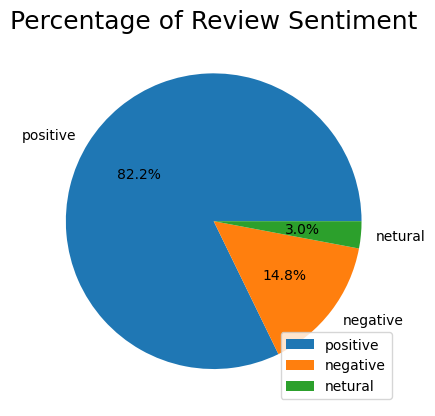

In [68]:
plt.pie(bp['sentiment'].value_counts(), labels=['positive', 'negative', 'netural'], autopct='%1.1f%%')
plt.title('Percentage of Review Sentiment', fontsize=18)
plt.legend()

Based on the sentiment analysis that has been conducted, 82.2% of the reviews provided are positive reviews, while 14.8% are negative reviews.

Text(0.5, 1.0, 'Top 5 Book With Positive Reviews')

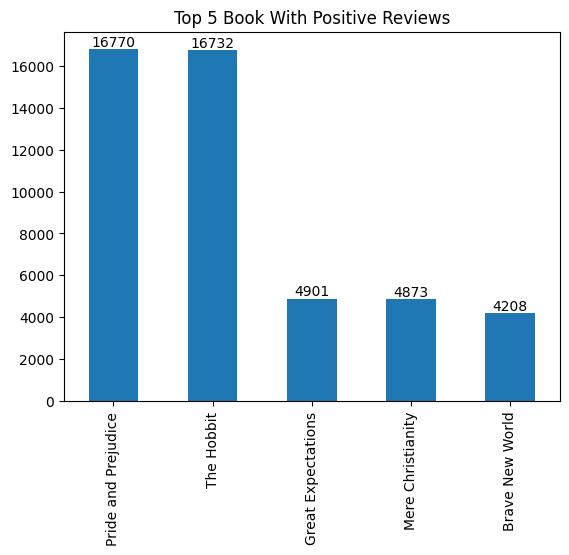

In [76]:
ax = bp[bp['sentiment'] == 'positive']['Title'].value_counts().head(5).plot(kind = 'bar')
plt.bar_label(ax.containers[0])
plt.title('Top 5 Book With Positive Reviews')

Text(0.5, 1.0, 'Top 5 Book With Negative Reviews')

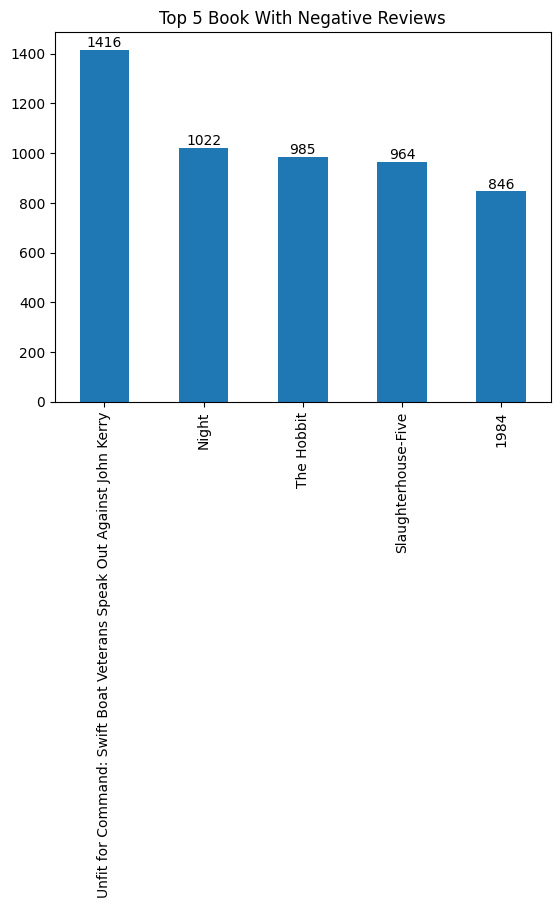

In [75]:
ax = bp[bp['sentiment'] == 'negative']['Title'].value_counts().head(5).plot(kind = 'bar')
plt.bar_label(ax.containers[0])
plt.title('Top 5 Book With Negative Reviews')

'Pride and Prejudice' is the book with the most positive reviews, with a total of 16,770 good reviews. Meanwhile, 'Unfit for Command: Swift Boat Veterans Speak Out Against John Kerry' is the book with the most negative reviews, with a total of 1,416 negative reviews.